In [ ]:
'''
计算各方法在某个合成数据集上的得分（综合局部/全局/聚类指标），对应论文中的图7
'''

In [2]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from functools import reduce

### 稳定性得分

In [23]:
'''
细胞数量稳定性得分
'''

datasets = ['cell_100','cell_500','cell_1k','cell_5k','cell_1w','cell_2w','cell_3w']
for dataset in datasets:
    # all_dfs = []
    # 局部与全局
    datapath1 = f'/home/henu/work/result/metric/simulate/{dataset}/dr1.csv'
    datapath2 = f'/home/henu/work/result/metric/simulate/{dataset}/dr2.csv'
    datapath8 = f'/home/henu/work/result/metric/simulate/{dataset}/dr3.csv'
    # 聚类
    datapath3 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_ARI.csv'
    datapath4 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_NMI.csv'
    datapath5 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_SIL.csv'
    datapath6 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_COMP.csv'
    datapath7 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_HOMO.csv'

    df1 = pd.read_csv(datapath1)
    df2 = pd.read_csv(datapath2)
    df3 = pd.read_csv(datapath3)
    df4 = pd.read_csv(datapath4)
    df5 = pd.read_csv(datapath5)
    df6 = pd.read_csv(datapath6)
    df7 = pd.read_csv(datapath7)
    df8 = pd.read_csv(datapath8)
    df_merge = reduce(lambda left, right: pd.merge(left, right, on="Method", how="outer"), [df1, df2, df3, df4, df5, df6, df7, df8])

    df_merge.insert(1, "Dataset", dataset)  # 加一列标记数据集名
    # all_dfs.append(df_merge)
    #
    # # 合并所有数据集
    # df_all = pd.concat(all_dfs, ignore_index=True)
    #
    # print("合并后的数据：")
    # print(df_all.head())
    print(df_merge.head())

    # 提取指标列（除了 Method 和 Dataset）
    metric_cols = [c for c in df_merge.columns if c not in ["Method", "Dataset",'AUC','Qlocal','Qglobal','kmax',
                                                          'knn_10','knn_20','nkr_10','nkr_20','aji_10','aji_20',
                                                          'T_10','T_20','C_10','C_20','nh_10','nh_20',
                                                          'Mrre_false_10','Mrre_false_20','Mrre_missing_10','Mrre_missing_20']]
    print(metric_cols)

    df_score = pd.DataFrame()
    df_score["Method"] = df_merge["Method"]
    df_score["Score"] = df_merge[metric_cols].mean(axis=1)

    output_file = f"/home/henu/work/result/score/stability/1/cell/{dataset}.csv"
    df_score.to_csv(output_file, index=False)
    print(f"结果已保存到文件：{output_file}")

   Method   Dataset  knn_10  knn_20  knn_30   svm  nkr_10  nkr_20  nkr_30  \
0     DRA  cell_100    0.19    0.28    0.26  0.24   0.082   0.187   0.279   
1   DREAM  cell_100    0.39    0.39    0.43  0.36   0.138   0.297   0.435   
2    EDGE  cell_100    0.42    0.46    0.47  0.46   0.128   0.242   0.342   
3  GLMPCA  cell_100    0.72    0.74    0.73  0.74   0.148   0.328   0.447   
4     PCA  cell_100    0.83    0.89    0.87  0.88   0.150   0.312   0.403   

   aji_10  ...  Mrre_false_10  Mrre_missing_10  Mrre_false_20  \
0   0.045  ...          0.492            0.552          0.488   
1   0.083  ...          0.575            0.710          0.581   
2   0.070  ...          0.550            0.583          0.545   
3   0.085  ...          0.626            0.711          0.627   
4   0.089  ...          0.624            0.681          0.622   

   Mrre_missing_20  Mrre_false_30  Mrre_missing_30  Pearson  nh_10  nh_20  \
0            0.531          0.480            0.518    0.096  0.206  0

In [24]:
'''
基因数量稳定性得分
'''

datasets = ['gene_5k','gene_2w','gene_3w','gene_4w','gene_5w']
for dataset in datasets:
    # all_dfs = []
    # 局部与全局
    datapath1 = f'/home/henu/work/result/metric/simulate/{dataset}/dr1.csv'
    datapath2 = f'/home/henu/work/result/metric/simulate/{dataset}/dr2.csv'
    datapath8 = f'/home/henu/work/result/metric/simulate/{dataset}/dr3.csv'
    # 聚类
    datapath3 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_ARI.csv'
    datapath4 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_NMI.csv'
    datapath5 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_SIL.csv'
    datapath6 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_COMP.csv'
    datapath7 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_HOMO.csv'

    df1 = pd.read_csv(datapath1)
    df2 = pd.read_csv(datapath2)
    df3 = pd.read_csv(datapath3)
    df4 = pd.read_csv(datapath4)
    df5 = pd.read_csv(datapath5)
    df6 = pd.read_csv(datapath6)
    df7 = pd.read_csv(datapath7)
    df8 = pd.read_csv(datapath8)
    df_merge = reduce(lambda left, right: pd.merge(left, right, on="Method", how="outer"), [df1, df2, df3, df4, df5, df6, df7, df8])

    df_merge.insert(1, "Dataset", dataset)  # 加一列标记数据集名
    # all_dfs.append(df_merge)
    #
    # # 合并所有数据集
    # df_all = pd.concat(all_dfs, ignore_index=True)
    #
    # print("合并后的数据：")
    # print(df_all.head())
    print(df_merge.head())

    # 提取指标列（除了 Method 和 Dataset）
    metric_cols = [c for c in df_merge.columns if c not in ["Method", "Dataset",'AUC','Qlocal','Qglobal','kmax',
                                                          'knn_10','knn_20','nkr_10','nkr_20','aji_10','aji_20',
                                                          'T_10','T_20','C_10','C_20','nh_10','nh_20',
                                                          'Mrre_false_10','Mrre_false_20','Mrre_missing_10','Mrre_missing_20']]
    print(metric_cols)

    df_score = pd.DataFrame()
    df_score["Method"] = df_merge["Method"]
    df_score["Score"] = df_merge[metric_cols].mean(axis=1)

    output_file = f"/home/henu/work/result/score/stability/1/gene/{dataset}.csv"
    df_score.to_csv(output_file, index=False)
    print(f"结果已保存到文件：{output_file}")

   Method  Dataset  knn_10  knn_20  knn_30    svm  nkr_10  nkr_20  nkr_30  \
0     DRA  gene_5k   0.230   0.248   0.270  0.301   0.004   0.010   0.015   
1   DREAM  gene_5k   0.266   0.276   0.281  0.308   0.005   0.011   0.016   
2    EDGE  gene_5k   0.932   0.934   0.934  0.932   0.016   0.031   0.045   
3  GLMPCA  gene_5k   0.974   0.973   0.973  0.974   0.016   0.031   0.045   
4     PCA  gene_5k   0.927   0.928   0.928  0.935   0.016   0.029   0.042   

   aji_10  ...  Mrre_false_10  Mrre_missing_10  Mrre_false_20  \
0   0.002  ...          0.505            0.497          0.504   
1   0.003  ...          0.501            0.581          0.501   
2   0.009  ...          0.614            0.783          0.614   
3   0.008  ...          0.627            0.806          0.630   
4   0.008  ...          0.616            0.799          0.617   

   Mrre_missing_20  Mrre_false_30  Mrre_missing_30  Pearson  nh_10  nh_20  \
0            0.500          0.504            0.502    0.031  0.228  0

In [25]:
'''
细胞类型数量稳定性得分
'''

datasets = ['celltype_7','celltype_9','celltype_11','celltype_13','celltype_15']
for dataset in datasets:
    # all_dfs = []
    # 局部与全局
    datapath1 = f'/home/henu/work/result/metric/simulate/{dataset}/dr1.csv'
    datapath2 = f'/home/henu/work/result/metric/simulate/{dataset}/dr2.csv'
    datapath8 = f'/home/henu/work/result/metric/simulate/{dataset}/dr3.csv'
    # 聚类
    datapath3 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_ARI.csv'
    datapath4 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_NMI.csv'
    datapath5 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_SIL.csv'
    datapath6 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_COMP.csv'
    datapath7 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_HOMO.csv'

    df1 = pd.read_csv(datapath1)
    df2 = pd.read_csv(datapath2)
    df3 = pd.read_csv(datapath3)
    df4 = pd.read_csv(datapath4)
    df5 = pd.read_csv(datapath5)
    df6 = pd.read_csv(datapath6)
    df7 = pd.read_csv(datapath7)
    df8 = pd.read_csv(datapath8)
    df_merge = reduce(lambda left, right: pd.merge(left, right, on="Method", how="outer"), [df1, df2, df3, df4, df5, df6, df7, df8])

    df_merge.insert(1, "Dataset", dataset)  # 加一列标记数据集名
    # all_dfs.append(df_merge)
    #
    # # 合并所有数据集
    # df_all = pd.concat(all_dfs, ignore_index=True)
    #
    # print("合并后的数据：")
    # print(df_all.head())
    print(df_merge.head())

    # 提取指标列（除了 Method 和 Dataset）
    metric_cols = [c for c in df_merge.columns if c not in ["Method", "Dataset",'AUC','Qlocal','Qglobal','kmax',
                                                          'knn_10','knn_20','nkr_10','nkr_20','aji_10','aji_20',
                                                          'T_10','T_20','C_10','C_20','nh_10','nh_20',
                                                          'Mrre_false_10','Mrre_false_20','Mrre_missing_10','Mrre_missing_20']]
    print(metric_cols)

    df_score = pd.DataFrame()
    df_score["Method"] = df_merge["Method"]
    df_score["Score"] = df_merge[metric_cols].mean(axis=1)

    output_file = f"/home/henu/work/result/score/stability/1/celltype/{dataset}.csv"
    df_score.to_csv(output_file, index=False)
    print(f"结果已保存到文件：{output_file}")

   Method     Dataset  knn_10  knn_20  knn_30    svm  nkr_10  nkr_20  nkr_30  \
0     DRA  celltype_7   0.158   0.159   0.150  0.128   0.005   0.011   0.016   
1   DREAM  celltype_7   0.136   0.143   0.150  0.176   0.005   0.010   0.015   
2    EDGE  celltype_7   0.731   0.731   0.730  0.736   0.016   0.029   0.041   
3  GLMPCA  celltype_7   0.713   0.727   0.728  0.742   0.017   0.030   0.041   
4     PCA  celltype_7   0.828   0.834   0.837  0.841   0.018   0.033   0.045   

   aji_10  ...  Mrre_false_10  Mrre_missing_10  Mrre_false_20  \
0   0.003  ...          0.500            0.554          0.501   
1   0.002  ...          0.499            0.489          0.500   
2   0.009  ...          0.587            0.717          0.587   
3   0.009  ...          0.597            0.750          0.598   
4   0.009  ...          0.611            0.728          0.612   

   Mrre_missing_20  Mrre_false_30  Mrre_missing_30  Pearson  nh_10  nh_20  \
0            0.548          0.501            0.544 

In [26]:
'''
批次数量稳定性得分
'''

datasets = ['batch_2','batch_4','batch_6','batch_8','batch_10']
for dataset in datasets:
    # all_dfs = []
    # 局部与全局
    datapath1 = f'/home/henu/work/result/metric/simulate/{dataset}/dr1.csv'
    datapath2 = f'/home/henu/work/result/metric/simulate/{dataset}/dr2.csv'
    datapath8 = f'/home/henu/work/result/metric/simulate/{dataset}/dr3.csv'
    # 聚类
    datapath3 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_ARI.csv'
    datapath4 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_NMI.csv'
    datapath5 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_SIL.csv'
    datapath6 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_COMP.csv'
    datapath7 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_HOMO.csv'

    df1 = pd.read_csv(datapath1)
    df2 = pd.read_csv(datapath2)
    df3 = pd.read_csv(datapath3)
    df4 = pd.read_csv(datapath4)
    df5 = pd.read_csv(datapath5)
    df6 = pd.read_csv(datapath6)
    df7 = pd.read_csv(datapath7)
    df8 = pd.read_csv(datapath8)
    df_merge = reduce(lambda left, right: pd.merge(left, right, on="Method", how="outer"), [df1, df2, df3, df4, df5, df6, df7, df8])

    df_merge.insert(1, "Dataset", dataset)  # 加一列标记数据集名
    # all_dfs.append(df_merge)
    #
    # # 合并所有数据集
    # df_all = pd.concat(all_dfs, ignore_index=True)
    #
    # print("合并后的数据：")
    # print(df_all.head())
    print(df_merge.head())

    # 提取指标列（除了 Method 和 Dataset）
    metric_cols = [c for c in df_merge.columns if c not in ["Method", "Dataset",'AUC','Qlocal','Qglobal','kmax',
                                                          'knn_10','knn_20','nkr_10','nkr_20','aji_10','aji_20',
                                                          'T_10','T_20','C_10','C_20','nh_10','nh_20',
                                                          'Mrre_false_10','Mrre_false_20','Mrre_missing_10','Mrre_missing_20']]
    print(metric_cols)

    df_score = pd.DataFrame()
    df_score["Method"] = df_merge["Method"]
    df_score["Score"] = df_merge[metric_cols].mean(axis=1)

    output_file = f"/home/henu/work/result/score/stability/1/batch_number/{dataset}.csv"
    df_score.to_csv(output_file, index=False)
    print(f"结果已保存到文件：{output_file}")

   Method  Dataset  knn_10  knn_20  knn_30    svm  nkr_10  nkr_20  nkr_30  \
0     DRA  batch_2   0.256   0.252   0.256  0.290   0.005   0.010   0.015   
1   DREAM  batch_2   0.459   0.490   0.485  0.508   0.008   0.015   0.023   
2    EDGE  batch_2   0.965   0.967   0.967  0.964   0.025   0.042   0.060   
3  GLMPCA  batch_2   0.739   0.756   0.760  0.765   0.020   0.036   0.050   
4     PCA  batch_2   0.760   0.776   0.773  0.769   0.020   0.035   0.049   

   aji_10  ...  Mrre_false_10  Mrre_missing_10  Mrre_false_20  \
0   0.003  ...          0.501            0.535          0.501   
1   0.004  ...          0.533            0.554          0.534   
2   0.013  ...          0.676            0.802          0.675   
3   0.010  ...          0.643            0.782          0.644   
4   0.010  ...          0.645            0.789          0.647   

   Mrre_missing_20  Mrre_false_30  Mrre_missing_30  Pearson  nh_10  nh_20  \
0            0.528          0.502            0.525    0.037  0.233  0

In [27]:
'''
批次强度稳定性得分
'''

datasets = ['batch_0.2','batch_0.4','batch_0.6','batch_0.8','batch_1.0']
for dataset in datasets:
    # all_dfs = []
    # 局部与全局
    datapath1 = f'/home/henu/work/result/metric/simulate/{dataset}/dr1.csv'
    datapath2 = f'/home/henu/work/result/metric/simulate/{dataset}/dr2.csv'
    datapath8 = f'/home/henu/work/result/metric/simulate/{dataset}/dr3.csv'
    # 聚类
    datapath3 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_ARI.csv'
    datapath4 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_NMI.csv'
    datapath5 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_SIL.csv'
    datapath6 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_COMP.csv'
    datapath7 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_HOMO.csv'

    df1 = pd.read_csv(datapath1)
    df2 = pd.read_csv(datapath2)
    df3 = pd.read_csv(datapath3)
    df4 = pd.read_csv(datapath4)
    df5 = pd.read_csv(datapath5)
    df6 = pd.read_csv(datapath6)
    df7 = pd.read_csv(datapath7)
    df8 = pd.read_csv(datapath8)
    df_merge = reduce(lambda left, right: pd.merge(left, right, on="Method", how="outer"), [df1, df2, df3, df4, df5, df6, df7, df8])

    df_merge.insert(1, "Dataset", dataset)  # 加一列标记数据集名
    # all_dfs.append(df_merge)
    #
    # # 合并所有数据集
    # df_all = pd.concat(all_dfs, ignore_index=True)
    #
    # print("合并后的数据：")
    # print(df_all.head())
    print(df_merge.head())

    # 提取指标列（除了 Method 和 Dataset）
    metric_cols = [c for c in df_merge.columns if c not in ["Method", "Dataset",'AUC','Qlocal','Qglobal','kmax',
                                                          'knn_10','knn_20','nkr_10','nkr_20','aji_10','aji_20',
                                                          'T_10','T_20','C_10','C_20','nh_10','nh_20',
                                                          'Mrre_false_10','Mrre_false_20','Mrre_missing_10','Mrre_missing_20']]
    print(metric_cols)

    df_score = pd.DataFrame()
    df_score["Method"] = df_merge["Method"]
    df_score["Score"] = df_merge[metric_cols].mean(axis=1)

    output_file = f"/home/henu/work/result/score/stability/1/batch_strength/{dataset}.csv"
    df_score.to_csv(output_file, index=False)
    print(f"结果已保存到文件：{output_file}")

   Method    Dataset  knn_10  knn_20  knn_30    svm  nkr_10  nkr_20  nkr_30  \
0     DRA  batch_0.2   0.244   0.270   0.282  0.298   0.005   0.010   0.015   
1   DREAM  batch_0.2   0.306   0.348   0.369  0.376   0.011   0.022   0.033   
2    EDGE  batch_0.2   0.901   0.901   0.900  0.847   0.033   0.058   0.080   
3  GLMPCA  batch_0.2   0.735   0.742   0.746  0.751   0.024   0.047   0.068   
4     PCA  batch_0.2   0.751   0.755   0.764  0.773   0.026   0.048   0.068   

   aji_10  ...  Mrre_false_10  Mrre_missing_10  Mrre_false_20  \
0   0.003  ...          0.499            0.503          0.499   
1   0.005  ...          0.732            0.767          0.732   
2   0.017  ...          0.802            0.885          0.802   
3   0.013  ...          0.787            0.878          0.788   
4   0.013  ...          0.787            0.879          0.788   

   Mrre_missing_20  Mrre_false_30  Mrre_missing_30  Pearson  nh_10  nh_20  \
0            0.503          0.499            0.503    0.0

In [28]:
'''
dropout概率稳定性得分
'''

datasets = ['dropout_-1','dropout_0','dropout_1','dropout_2','dropout_3']
for dataset in datasets:
    # all_dfs = []
    # 局部与全局
    datapath1 = f'/home/henu/work/result/metric/simulate/{dataset}/dr1.csv'
    datapath2 = f'/home/henu/work/result/metric/simulate/{dataset}/dr2.csv'
    datapath8 = f'/home/henu/work/result/metric/simulate/{dataset}/dr3.csv'
    # 聚类
    datapath3 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_ARI.csv'
    datapath4 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_NMI.csv'
    datapath5 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_SIL.csv'
    datapath6 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_COMP.csv'
    datapath7 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_HOMO.csv'

    df1 = pd.read_csv(datapath1)
    df2 = pd.read_csv(datapath2)
    df3 = pd.read_csv(datapath3)
    df4 = pd.read_csv(datapath4)
    df5 = pd.read_csv(datapath5)
    df6 = pd.read_csv(datapath6)
    df7 = pd.read_csv(datapath7)
    df8 = pd.read_csv(datapath8)
    df_merge = reduce(lambda left, right: pd.merge(left, right, on="Method", how="outer"), [df1, df2, df3, df4, df5, df6, df7, df8])

    df_merge.insert(1, "Dataset", dataset)  # 加一列标记数据集名
    # all_dfs.append(df_merge)
    #
    # # 合并所有数据集
    # df_all = pd.concat(all_dfs, ignore_index=True)
    #
    # print("合并后的数据：")
    # print(df_all.head())
    print(df_merge.head())

    # 提取指标列（除了 Method 和 Dataset）
    metric_cols = [c for c in df_merge.columns if c not in ["Method", "Dataset",'AUC','Qlocal','Qglobal','kmax',
                                                          'knn_10','knn_20','nkr_10','nkr_20','aji_10','aji_20',
                                                          'T_10','T_20','C_10','C_20','nh_10','nh_20',
                                                          'Mrre_false_10','Mrre_false_20','Mrre_missing_10','Mrre_missing_20']]
    print(metric_cols)

    df_score = pd.DataFrame()
    df_score["Method"] = df_merge["Method"]
    df_score["Score"] = df_merge[metric_cols].mean(axis=1)

    output_file = f"/home/henu/work/result/score/stability/1/dropout/{dataset}.csv"
    df_score.to_csv(output_file, index=False)
    print(f"结果已保存到文件：{output_file}")

   Method     Dataset  knn_10  knn_20  knn_30    svm  nkr_10  nkr_20  nkr_30  \
0     DRA  dropout_-1   0.232   0.256   0.256  0.290   0.005   0.010   0.015   
1   DREAM  dropout_-1   0.332   0.370   0.376  0.398   0.006   0.012   0.018   
2    EDGE  dropout_-1   0.956   0.959   0.960  0.960   0.020   0.036   0.051   
3  GLMPCA  dropout_-1   0.917   0.924   0.929  0.925   0.016   0.031   0.045   
4     PCA  dropout_-1   0.957   0.958   0.959  0.961   0.018   0.033   0.048   

   aji_10  ...  Mrre_false_10  Mrre_missing_10  Mrre_false_20  \
0   0.003  ...          0.499            0.542          0.500   
1   0.003  ...          0.508            0.525          0.508   
2   0.010  ...          0.639            0.804          0.639   
3   0.008  ...          0.629            0.824          0.629   
4   0.010  ...          0.632            0.813          0.634   

   Mrre_missing_20  Mrre_false_30  Mrre_missing_30  Pearson  nh_10  nh_20  \
0            0.536          0.500            0.533 

In [29]:
'''
差异基因比例稳定性得分
'''

datasets = ['de_prob_0.05','de_prob_0.15','de_prob_0.2','de_prob_0.25','de_prob_0.3']
for dataset in datasets:
    # all_dfs = []
    # 局部与全局
    datapath1 = f'/home/henu/work/result/metric/simulate/{dataset}/dr1.csv'
    datapath2 = f'/home/henu/work/result/metric/simulate/{dataset}/dr2.csv'
    datapath8 = f'/home/henu/work/result/metric/simulate/{dataset}/dr3.csv'
    # 聚类
    datapath3 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_ARI.csv'
    datapath4 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_NMI.csv'
    datapath5 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_SIL.csv'
    datapath6 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_COMP.csv'
    datapath7 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_HOMO.csv'

    df1 = pd.read_csv(datapath1)
    df2 = pd.read_csv(datapath2)
    df3 = pd.read_csv(datapath3)
    df4 = pd.read_csv(datapath4)
    df5 = pd.read_csv(datapath5)
    df6 = pd.read_csv(datapath6)
    df7 = pd.read_csv(datapath7)
    df8 = pd.read_csv(datapath8)
    df_merge = reduce(lambda left, right: pd.merge(left, right, on="Method", how="outer"), [df1, df2, df3, df4, df5, df6, df7, df8])

    df_merge.insert(1, "Dataset", dataset)  # 加一列标记数据集名
    # all_dfs.append(df_merge)
    #
    # # 合并所有数据集
    # df_all = pd.concat(all_dfs, ignore_index=True)
    #
    # print("合并后的数据：")
    # print(df_all.head())
    print(df_merge.head())

    # 提取指标列（除了 Method 和 Dataset）
    metric_cols = [c for c in df_merge.columns if c not in ["Method", "Dataset",'AUC','Qlocal','Qglobal','kmax',
                                                          'knn_10','knn_20','nkr_10','nkr_20','aji_10','aji_20',
                                                          'T_10','T_20','C_10','C_20','nh_10','nh_20',
                                                          'Mrre_false_10','Mrre_false_20','Mrre_missing_10','Mrre_missing_20']]
    print(metric_cols)

    df_score = pd.DataFrame()
    df_score["Method"] = df_merge["Method"]
    df_score["Score"] = df_merge[metric_cols].mean(axis=1)

    output_file = f"/home/henu/work/result/score/stability/1/de/{dataset}.csv"
    df_score.to_csv(output_file, index=False)
    print(f"结果已保存到文件：{output_file}")

   Method       Dataset  knn_10  knn_20  knn_30    svm  nkr_10  nkr_20  \
0     DRA  de_prob_0.05   0.241   0.260   0.264  0.288   0.005   0.010   
1   DREAM  de_prob_0.05   0.256   0.285   0.289  0.286   0.006   0.011   
2    EDGE  de_prob_0.05   0.489   0.508   0.517  0.524   0.008   0.014   
3  GLMPCA  de_prob_0.05   0.787   0.799   0.812  0.812   0.009   0.018   
4     PCA  de_prob_0.05   0.950   0.952   0.951  0.947   0.010   0.021   

   nkr_30  aji_10  ...  Mrre_false_10  Mrre_missing_10  Mrre_false_20  \
0   0.016   0.002  ...          0.502            0.555          0.501   
1   0.015   0.003  ...          0.500            0.528          0.501   
2   0.021   0.004  ...          0.519            0.616          0.520   
3   0.026   0.005  ...          0.554            0.653          0.555   
4   0.030   0.005  ...          0.567            0.682          0.568   

   Mrre_missing_20  Mrre_false_30  Mrre_missing_30  Pearson  nh_10  nh_20  \
0            0.545          0.501      

In [30]:
'''
差异基因强度稳定性得分
'''

datasets = ['de_0.2','de_0.4','de_0.6','de_0.8','de_1.0']
for dataset in datasets:
    # all_dfs = []
    # 局部与全局
    datapath1 = f'/home/henu/work/result/metric/simulate/{dataset}/dr1.csv'
    datapath2 = f'/home/henu/work/result/metric/simulate/{dataset}/dr2.csv'
    datapath8 = f'/home/henu/work/result/metric/simulate/{dataset}/dr3.csv'
    # 聚类
    datapath3 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_ARI.csv'
    datapath4 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_NMI.csv'
    datapath5 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_SIL.csv'
    datapath6 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_COMP.csv'
    datapath7 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_HOMO.csv'

    df1 = pd.read_csv(datapath1)
    df2 = pd.read_csv(datapath2)
    df3 = pd.read_csv(datapath3)
    df4 = pd.read_csv(datapath4)
    df5 = pd.read_csv(datapath5)
    df6 = pd.read_csv(datapath6)
    df7 = pd.read_csv(datapath7)
    df8 = pd.read_csv(datapath8)
    df_merge = reduce(lambda left, right: pd.merge(left, right, on="Method", how="outer"), [df1, df2, df3, df4, df5, df6, df7, df8])

    df_merge.insert(1, "Dataset", dataset)  # 加一列标记数据集名
    # all_dfs.append(df_merge)
    #
    # # 合并所有数据集
    # df_all = pd.concat(all_dfs, ignore_index=True)
    #
    # print("合并后的数据：")
    # print(df_all.head())
    print(df_merge.head())

    # 提取指标列（除了 Method 和 Dataset）
    metric_cols = [c for c in df_merge.columns if c not in ["Method", "Dataset",'AUC','Qlocal','Qglobal','kmax',
                                                          'knn_10','knn_20','nkr_10','nkr_20','aji_10','aji_20',
                                                          'T_10','T_20','C_10','C_20','nh_10','nh_20',
                                                          'Mrre_false_10','Mrre_false_20','Mrre_missing_10','Mrre_missing_20']]
    print(metric_cols)

    df_score = pd.DataFrame()
    df_score["Method"] = df_merge["Method"]
    df_score["Score"] = df_merge[metric_cols].mean(axis=1)

    output_file = f"/home/henu/work/result/score/stability/1/de_strength/{dataset}.csv"
    df_score.to_csv(output_file, index=False)
    print(f"结果已保存到文件：{output_file}")

   Method Dataset  knn_10  knn_20  knn_30    svm  nkr_10  nkr_20  nkr_30  \
0     DRA  de_0.2   0.260   0.264   0.275  0.289   0.006   0.010   0.015   
1   DREAM  de_0.2   0.241   0.274   0.285  0.304   0.005   0.010   0.015   
2    EDGE  de_0.2   0.341   0.361   0.376  0.386   0.006   0.012   0.017   
3  GLMPCA  de_0.2   0.823   0.816   0.826  0.835   0.009   0.017   0.024   
4     PCA  de_0.2   0.873   0.874   0.870  0.876   0.008   0.017   0.024   

   aji_10  ...  Mrre_false_10  Mrre_missing_10  Mrre_false_20  \
0   0.003  ...          0.499            0.547          0.499   
1   0.003  ...          0.501            0.525          0.501   
2   0.003  ...          0.508            0.630          0.509   
3   0.005  ...          0.550            0.684          0.551   
4   0.004  ...          0.548            0.633          0.549   

   Mrre_missing_20  Mrre_false_30  Mrre_missing_30  Pearson  nh_10  nh_20  \
0            0.536          0.499            0.531    0.037  0.229  0.229  

In [31]:
'''
异常值概率稳定性得分
'''

datasets = ['out_0.1','out_0.2','out_0.3','out_0.4','out_0.5']
for dataset in datasets:
    # all_dfs = []
    # 局部与全局
    datapath1 = f'/home/henu/work/result/metric/simulate/{dataset}/dr1.csv'
    datapath2 = f'/home/henu/work/result/metric/simulate/{dataset}/dr2.csv'
    datapath8 = f'/home/henu/work/result/metric/simulate/{dataset}/dr3.csv'
    # 聚类
    datapath3 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_ARI.csv'
    datapath4 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_NMI.csv'
    datapath5 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_SIL.csv'
    datapath6 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_COMP.csv'
    datapath7 = f'/home/henu/work/result/cluster/simulate/{dataset}/indicators/kmeans_HOMO.csv'

    df1 = pd.read_csv(datapath1)
    df2 = pd.read_csv(datapath2)
    df3 = pd.read_csv(datapath3)
    df4 = pd.read_csv(datapath4)
    df5 = pd.read_csv(datapath5)
    df6 = pd.read_csv(datapath6)
    df7 = pd.read_csv(datapath7)
    df8 = pd.read_csv(datapath8)
    df_merge = reduce(lambda left, right: pd.merge(left, right, on="Method", how="outer"), [df1, df2, df3, df4, df5, df6, df7, df8])

    df_merge.insert(1, "Dataset", dataset)  # 加一列标记数据集名
    # all_dfs.append(df_merge)
    #
    # # 合并所有数据集
    # df_all = pd.concat(all_dfs, ignore_index=True)
    #
    # print("合并后的数据：")
    # print(df_all.head())
    print(df_merge.head())

    # 提取指标列（除了 Method 和 Dataset）
    metric_cols = [c for c in df_merge.columns if c not in ["Method", "Dataset",'AUC','Qlocal','Qglobal','kmax',
                                                          'knn_10','knn_20','nkr_10','nkr_20','aji_10','aji_20',
                                                          'T_10','T_20','C_10','C_20','nh_10','nh_20',
                                                          'Mrre_false_10','Mrre_false_20','Mrre_missing_10','Mrre_missing_20']]
    print(metric_cols)

    df_score = pd.DataFrame()
    df_score["Method"] = df_merge["Method"]
    df_score["Score"] = df_merge[metric_cols].mean(axis=1)

    output_file = f"/home/henu/work/result/score/stability/1/out/{dataset}.csv"
    df_score.to_csv(output_file, index=False)
    print(f"结果已保存到文件：{output_file}")

   Method  Dataset  knn_10  knn_20  knn_30    svm  nkr_10  nkr_20  nkr_30  \
0     DRA  out_0.1   0.263   0.256   0.259  0.294   0.006   0.011   0.016   
1   DREAM  out_0.1   0.280   0.326   0.342  0.364   0.006   0.011   0.016   
2    EDGE  out_0.1   0.976   0.973   0.977  0.978   0.021   0.037   0.052   
3  GLMPCA  out_0.1   0.925   0.934   0.932  0.938   0.018   0.033   0.048   
4     PCA  out_0.1   0.892   0.899   0.900  0.903   0.018   0.033   0.048   

   aji_10  ...  Mrre_false_10  Mrre_missing_10  Mrre_false_20  \
0   0.003  ...          0.503            0.497          0.503   
1   0.003  ...          0.507            0.529          0.507   
2   0.011  ...          0.652            0.815          0.652   
3   0.009  ...          0.638            0.843          0.639   
4   0.009  ...          0.637            0.848          0.637   

   Mrre_missing_20  Mrre_false_30  Mrre_missing_30  Pearson  nh_10  nh_20  \
0            0.497          0.503            0.497    0.030  0.234  0

## 热图

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import os

In [87]:
from matplotlib.colors import LinearSegmentedColormap


colors = [
    "#440154",
    "#3b528b",
    "#21918c",
    "#5ec962",
    "#fde725"
]

cmap = LinearSegmentedColormap.from_list("custom_viridis", colors)

In [88]:
from matplotlib.colors import LinearSegmentedColormap


colors = [
    "#94D5FF",
    "#BDE2FF",
    "#C0F39A",
    "#D5F6C0",
    "#FFFF84"
]

cmap = LinearSegmentedColormap.from_list("custom_viridis", colors)

Index(['PCA', 'SSNMDI', 'pCMF', 'tGPLVM', 'ZIFA', 'scGBM', 'GLMPCA', 'VAE',
       'scGAE', 'scvis', 'SCDRHA', 'DREAM', 'SAUCIE', 'DRA', 'scScope', 'UMAP',
       'PHATE', 'SIMLR', 'EDGE', 'SPDR', 'TSNE', 'TriMap', 'PaCMAP', 'ivis',
       'SQuadMDS'],
      dtype='object', name='Method')


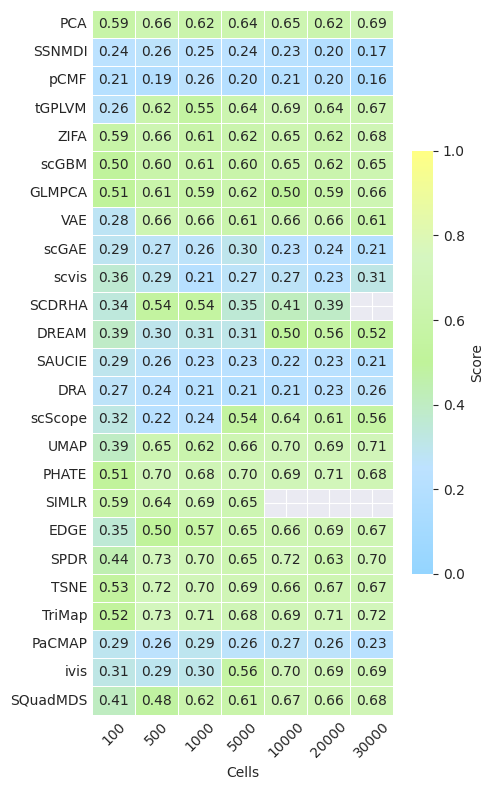

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

datasets = ['cell_100','cell_500','cell_1k','cell_5k','cell_1w','cell_2w','cell_3w']

score_dict = {}

for dataset in datasets:
    score_path = f'/home/henu/work/result/score/stability/1/cell/{dataset}.csv'
    df = pd.read_csv(score_path)
    s = df.set_index('Method')['Score']
    score_dict[dataset] = s

df_all = pd.concat(score_dict, axis=1)
df_all.columns = datasets

# 去掉不用的方法，并改名
excluded_methods = ['SQuaD_MDS', 'ParametricUMAP200', 'ParametricUMAP50']
df_all = df_all[~df_all.index.isin(excluded_methods)]
df_all.rename(index={'SQuaD_MDS_hybrid': 'SQuadMDS'}, inplace=True)

# ------------ 1. 按类别给方法排序 ------------
categories = {
    "Linear and Probabilistic Factor Models": [
        "PCA", "SSNMDI", "pCMF", "tGPLVM", "ZIFA", "scGBM", "GLMPCA"
    ],
    "Deep Autoencoders and Generative Models": [
        "VAE", "scGAE", "scvis", "SCDRHA", "DREAM","SAUCIE", "DRA", "scScope"
    ],
    "Graph-Based and Diffusion Geometry Models": [
        "UMAP", "PHATE", "SIMLR", "EDGE", "SPDR"
    ],
    "Metric Learning and Structure-Aware Embedding": [
        "TSNE", "TriMap", "PaCMAP", "ivis", "SQuadMDS"
    ]
}

# 按类别直接拼接顺序（严格使用你写的顺序）
method_order = (
    categories["Linear and Probabilistic Factor Models"] +
    categories["Deep Autoencoders and Generative Models"] +
    categories["Graph-Based and Diffusion Geometry Models"] +
    categories["Metric Learning and Structure-Aware Embedding"]
)

df_all = df_all.loc[method_order]
print(df_all.index)

# ------------ 2. 画热图（按你原来的格式） ------------
heatmap_data = df_all.copy()
heatmap_data.columns = ['100','500','1000','5000','10000','20000','30000']

plt.figure(figsize=(5, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap=cmap,     # 你前面定义好的配色
    linewidths=0.5,
    cbar_kws={'label': 'Score', 'shrink': 0.6, 'extend': 'neither'},
    vmin=0.0,
    vmax=1.0
)

# 坐标轴装饰（照你给的模板）
ax.set_xlabel('Cells')
ax.set_ylabel('')
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='both', length=0)
# ax.xaxis.tick_bottom()
plt.xticks(rotation=45)

plt.tight_layout()

save_dir = '/home/henu/work/result/score/stability/1/figures/'
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'cell.svg'))
plt.show()

Index(['PCA', 'SSNMDI', 'pCMF', 'tGPLVM', 'ZIFA', 'scGBM', 'GLMPCA', 'VAE',
       'scGAE', 'scvis', 'SCDRHA', 'DREAM', 'SAUCIE', 'DRA', 'scScope', 'UMAP',
       'PHATE', 'SIMLR', 'EDGE', 'SPDR', 'TSNE', 'TriMap', 'PaCMAP', 'ivis',
       'SQuadMDS'],
      dtype='object', name='Method')


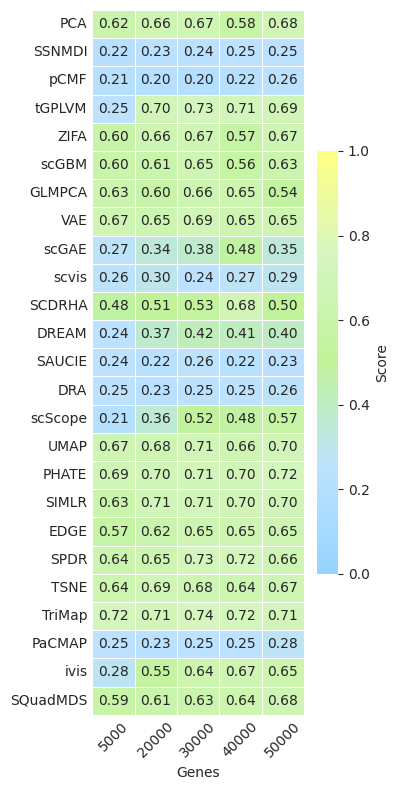

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

datasets = ['gene_5k','gene_2w','gene_3w','gene_4w','gene_5w']

score_dict = {}

for dataset in datasets:
    score_path = f'/home/henu/work/result/score/stability/1/gene/{dataset}.csv'
    df = pd.read_csv(score_path)
    s = df.set_index('Method')['Score']
    score_dict[dataset] = s

df_all = pd.concat(score_dict, axis=1)
df_all.columns = datasets

# 去掉不用的方法，并改名
excluded_methods = ['SQuaD_MDS', 'ParametricUMAP200', 'ParametricUMAP50']
df_all = df_all[~df_all.index.isin(excluded_methods)]
df_all.rename(index={'SQuaD_MDS_hybrid': 'SQuadMDS'}, inplace=True)

# ------------ 1. 按类别给方法排序 ------------
categories = {
    "Linear and Probabilistic Factor Models": [
        "PCA", "SSNMDI", "pCMF", "tGPLVM", "ZIFA", "scGBM", "GLMPCA"
    ],
    "Deep Autoencoders and Generative Models": [
        "VAE", "scGAE", "scvis", "SCDRHA", "DREAM","SAUCIE", "DRA", "scScope"
    ],
    "Graph-Based and Diffusion Geometry Models": [
        "UMAP", "PHATE", "SIMLR", "EDGE", "SPDR"
    ],
    "Metric Learning and Structure-Aware Embedding": [
        "TSNE", "TriMap", "PaCMAP", "ivis", "SQuadMDS"
    ]
}

# 按类别直接拼接顺序（严格使用你写的顺序）
method_order = (
    categories["Linear and Probabilistic Factor Models"] +
    categories["Deep Autoencoders and Generative Models"] +
    categories["Graph-Based and Diffusion Geometry Models"] +
    categories["Metric Learning and Structure-Aware Embedding"]
)

df_all = df_all.loc[method_order]
print(df_all.index)

# ------------ 2. 画热图（按你原来的格式） ------------
heatmap_data = df_all.copy()
heatmap_data.columns = ['5000','20000','30000','40000','50000']

plt.figure(figsize=(4, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap=cmap,     # 你前面定义好的配色
    linewidths=0.5,
    cbar_kws={'label': 'Score', 'shrink': 0.6, 'extend': 'neither'},
    vmin=0.0,
    vmax=1.0
)

# 坐标轴装饰（照你给的模板）
ax.set_xlabel('Genes')
ax.set_ylabel('')
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='both', length=0)
# ax.xaxis.tick_bottom()
plt.xticks(rotation=45)

plt.tight_layout()

save_dir = '/home/henu/work/result/score/stability/1/figures/'
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'gene.svg'))
plt.show()

Index(['PCA', 'SSNMDI', 'pCMF', 'tGPLVM', 'ZIFA', 'scGBM', 'GLMPCA', 'VAE',
       'scGAE', 'scvis', 'SCDRHA', 'DREAM', 'SAUCIE', 'DRA', 'scScope', 'UMAP',
       'PHATE', 'SIMLR', 'EDGE', 'SPDR', 'TSNE', 'TriMap', 'PaCMAP', 'ivis',
       'SQuadMDS'],
      dtype='object', name='Method')


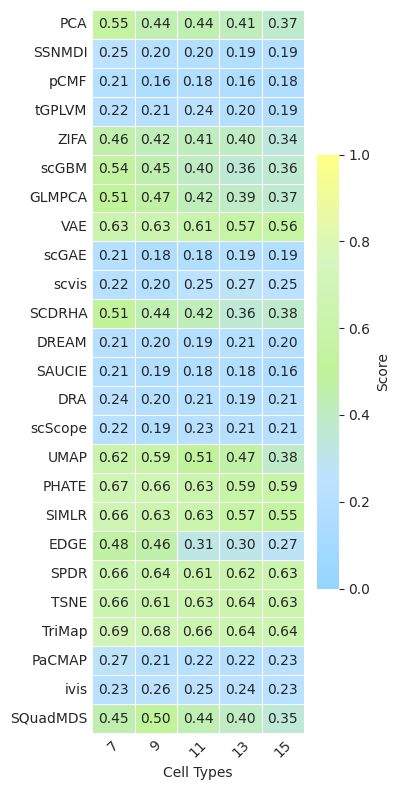

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

datasets = ['celltype_7','celltype_9','celltype_11','celltype_13','celltype_15']

score_dict = {}

for dataset in datasets:
    score_path = f'/home/henu/work/result/score/stability/1/celltype/{dataset}.csv'
    df = pd.read_csv(score_path)
    s = df.set_index('Method')['Score']
    score_dict[dataset] = s

df_all = pd.concat(score_dict, axis=1)
df_all.columns = datasets

# 去掉不用的方法，并改名
excluded_methods = ['SQuaD_MDS', 'ParametricUMAP200', 'ParametricUMAP50']
df_all = df_all[~df_all.index.isin(excluded_methods)]
df_all.rename(index={'SQuaD_MDS_hybrid': 'SQuadMDS'}, inplace=True)

# ------------ 1. 按类别给方法排序 ------------
categories = {
    "Linear and Probabilistic Factor Models": [
        "PCA", "SSNMDI", "pCMF", "tGPLVM", "ZIFA", "scGBM", "GLMPCA"
    ],
    "Deep Autoencoders and Generative Models": [
        "VAE", "scGAE", "scvis", "SCDRHA", "DREAM","SAUCIE", "DRA", "scScope"
    ],
    "Graph-Based and Diffusion Geometry Models": [
        "UMAP", "PHATE", "SIMLR", "EDGE", "SPDR"
    ],
    "Metric Learning and Structure-Aware Embedding": [
        "TSNE", "TriMap", "PaCMAP", "ivis", "SQuadMDS"
    ]
}

# 按类别直接拼接顺序（严格使用你写的顺序）
method_order = (
    categories["Linear and Probabilistic Factor Models"] +
    categories["Deep Autoencoders and Generative Models"] +
    categories["Graph-Based and Diffusion Geometry Models"] +
    categories["Metric Learning and Structure-Aware Embedding"]
)

df_all = df_all.loc[method_order]
print(df_all.index)

# ------------ 2. 画热图（按你原来的格式） ------------
heatmap_data = df_all.copy()
heatmap_data.columns = ['7','9','11','13','15']

plt.figure(figsize=(4, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap=cmap,     # 你前面定义好的配色
    linewidths=0.5,
    cbar_kws={'label': 'Score', 'shrink': 0.6, 'extend': 'neither'},
    vmin=0.0,
    vmax=1.0
)

# 坐标轴装饰（照你给的模板）
ax.set_xlabel('Cell Types')
ax.set_ylabel('')
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='both', length=0)
# ax.xaxis.tick_bottom()
plt.xticks(rotation=45)

plt.tight_layout()

save_dir = '/home/henu/work/result/score/stability/1/figures/'
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'celltype.svg'))
plt.show()

Index(['PCA', 'SSNMDI', 'pCMF', 'tGPLVM', 'ZIFA', 'scGBM', 'GLMPCA', 'VAE',
       'scGAE', 'scvis', 'SCDRHA', 'DREAM', 'SAUCIE', 'DRA', 'scScope', 'UMAP',
       'PHATE', 'SIMLR', 'EDGE', 'SPDR', 'TSNE', 'TriMap', 'PaCMAP', 'ivis',
       'SQuadMDS'],
      dtype='object', name='Method')


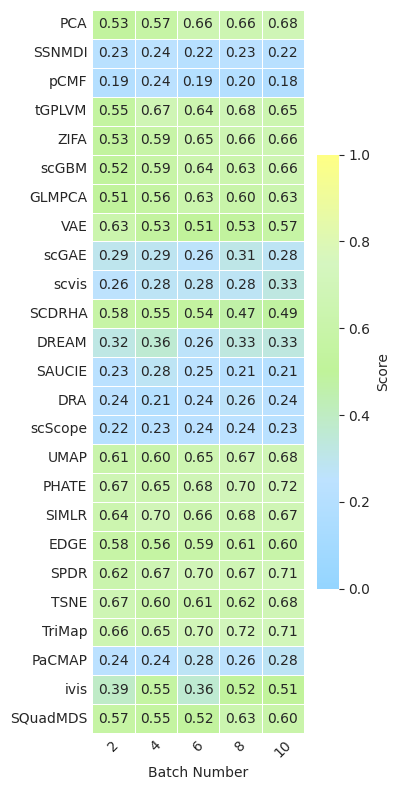

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

datasets = ['batch_2','batch_4','batch_6','batch_8','batch_10']

score_dict = {}

for dataset in datasets:
    score_path = f'/home/henu/work/result/score/stability/1/batch_number/{dataset}.csv'
    df = pd.read_csv(score_path)
    s = df.set_index('Method')['Score']
    score_dict[dataset] = s

df_all = pd.concat(score_dict, axis=1)
df_all.columns = datasets

# 去掉不用的方法，并改名
excluded_methods = ['SQuaD_MDS', 'ParametricUMAP200', 'ParametricUMAP50']
df_all = df_all[~df_all.index.isin(excluded_methods)]
df_all.rename(index={'SQuaD_MDS_hybrid': 'SQuadMDS'}, inplace=True)

# ------------ 1. 按类别给方法排序 ------------
categories = {
    "Linear and Probabilistic Factor Models": [
        "PCA", "SSNMDI", "pCMF", "tGPLVM", "ZIFA", "scGBM", "GLMPCA"
    ],
    "Deep Autoencoders and Generative Models": [
        "VAE", "scGAE", "scvis", "SCDRHA", "DREAM","SAUCIE", "DRA", "scScope"
    ],
    "Graph-Based and Diffusion Geometry Models": [
        "UMAP", "PHATE", "SIMLR", "EDGE", "SPDR"
    ],
    "Metric Learning and Structure-Aware Embedding": [
        "TSNE", "TriMap", "PaCMAP", "ivis", "SQuadMDS"
    ]
}

# 按类别直接拼接顺序（严格使用你写的顺序）
method_order = (
    categories["Linear and Probabilistic Factor Models"] +
    categories["Deep Autoencoders and Generative Models"] +
    categories["Graph-Based and Diffusion Geometry Models"] +
    categories["Metric Learning and Structure-Aware Embedding"]
)

df_all = df_all.loc[method_order]
print(df_all.index)

# ------------ 2. 画热图（按你原来的格式） ------------
heatmap_data = df_all.copy()
heatmap_data.columns = ['2','4','6','8','10']

plt.figure(figsize=(4, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap=cmap,     # 你前面定义好的配色
    linewidths=0.5,
    cbar_kws={'label': 'Score', 'shrink': 0.6, 'extend': 'neither'},
    vmin=0.0,
    vmax=1.0
)

# 坐标轴装饰（照你给的模板）
ax.set_xlabel('Batch Number')
ax.set_ylabel('')
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='both', length=0)
# ax.xaxis.tick_bottom()
plt.xticks(rotation=45)

plt.tight_layout()

save_dir = '/home/henu/work/result/score/stability/1/figures/'
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'batch_number.svg'))
plt.show()

Index(['PCA', 'SSNMDI', 'pCMF', 'tGPLVM', 'ZIFA', 'scGBM', 'GLMPCA', 'VAE',
       'scGAE', 'scvis', 'SCDRHA', 'DREAM', 'SAUCIE', 'DRA', 'scScope', 'UMAP',
       'PHATE', 'SIMLR', 'EDGE', 'SPDR', 'TSNE', 'TriMap', 'PaCMAP', 'ivis',
       'SQuadMDS'],
      dtype='object', name='Method')


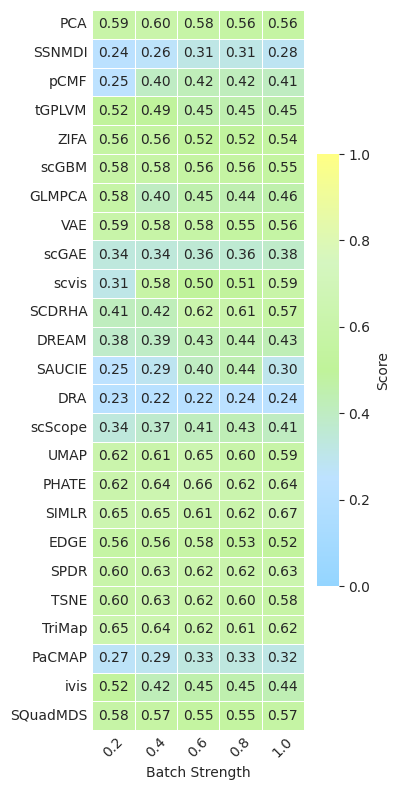

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

datasets = ['batch_0.2','batch_0.4','batch_0.6','batch_0.8','batch_1.0']

score_dict = {}

for dataset in datasets:
    score_path = f'/home/henu/work/result/score/stability/1/batch_strength/{dataset}.csv'
    df = pd.read_csv(score_path)
    s = df.set_index('Method')['Score']
    score_dict[dataset] = s

df_all = pd.concat(score_dict, axis=1)
df_all.columns = datasets

# 去掉不用的方法，并改名
excluded_methods = ['SQuaD_MDS', 'ParametricUMAP200', 'ParametricUMAP50']
df_all = df_all[~df_all.index.isin(excluded_methods)]
df_all.rename(index={'SQuaD_MDS_hybrid': 'SQuadMDS'}, inplace=True)

# ------------ 1. 按类别给方法排序 ------------
categories = {
    "Linear and Probabilistic Factor Models": [
        "PCA", "SSNMDI", "pCMF", "tGPLVM", "ZIFA", "scGBM", "GLMPCA"
    ],
    "Deep Autoencoders and Generative Models": [
        "VAE", "scGAE", "scvis", "SCDRHA", "DREAM","SAUCIE", "DRA", "scScope"
    ],
    "Graph-Based and Diffusion Geometry Models": [
        "UMAP", "PHATE", "SIMLR", "EDGE", "SPDR"
    ],
    "Metric Learning and Structure-Aware Embedding": [
        "TSNE", "TriMap", "PaCMAP", "ivis", "SQuadMDS"
    ]
}

# 按类别直接拼接顺序（严格使用你写的顺序）
method_order = (
    categories["Linear and Probabilistic Factor Models"] +
    categories["Deep Autoencoders and Generative Models"] +
    categories["Graph-Based and Diffusion Geometry Models"] +
    categories["Metric Learning and Structure-Aware Embedding"]
)

df_all = df_all.loc[method_order]
print(df_all.index)

# ------------ 2. 画热图（按你原来的格式） ------------
heatmap_data = df_all.copy()
heatmap_data.columns = ['0.2','0.4','0.6','0.8','1.0']

plt.figure(figsize=(4, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap=cmap,     # 你前面定义好的配色
    linewidths=0.5,
    cbar_kws={'label': 'Score', 'shrink': 0.6, 'extend': 'neither'},
    vmin=0.0,
    vmax=1.0
)

# 坐标轴装饰（照你给的模板）
ax.set_xlabel('Batch Strength')
ax.set_ylabel('')
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='both', length=0)
# ax.xaxis.tick_bottom()
plt.xticks(rotation=45)

plt.tight_layout()

save_dir = '/home/henu/work/result/score/stability/1/figures/'
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'batch_strength.svg'))
plt.show()

Index(['PCA', 'SSNMDI', 'pCMF', 'tGPLVM', 'ZIFA', 'scGBM', 'GLMPCA', 'VAE',
       'scGAE', 'scvis', 'SCDRHA', 'DREAM', 'SAUCIE', 'DRA', 'scScope', 'UMAP',
       'PHATE', 'SIMLR', 'EDGE', 'SPDR', 'TSNE', 'TriMap', 'PaCMAP', 'ivis',
       'SQuadMDS'],
      dtype='object', name='Method')


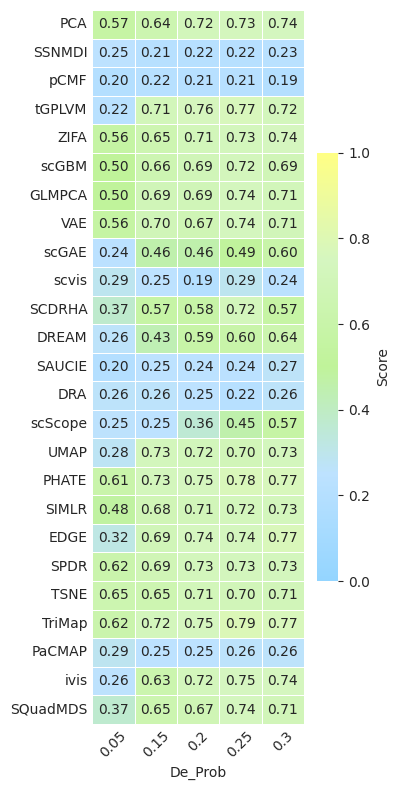

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

datasets = ['de_prob_0.05','de_prob_0.15','de_prob_0.2','de_prob_0.25','de_prob_0.3']

score_dict = {}

for dataset in datasets:
    score_path = f'/home/henu/work/result/score/stability/1/de/{dataset}.csv'
    df = pd.read_csv(score_path)
    s = df.set_index('Method')['Score']
    score_dict[dataset] = s

df_all = pd.concat(score_dict, axis=1)
df_all.columns = datasets

# 去掉不用的方法，并改名
excluded_methods = ['SQuaD_MDS', 'ParametricUMAP200', 'ParametricUMAP50']
df_all = df_all[~df_all.index.isin(excluded_methods)]
df_all.rename(index={'SQuaD_MDS_hybrid': 'SQuadMDS'}, inplace=True)

# ------------ 1. 按类别给方法排序 ------------
categories = {
    "Linear and Probabilistic Factor Models": [
        "PCA", "SSNMDI", "pCMF", "tGPLVM", "ZIFA", "scGBM", "GLMPCA"
    ],
    "Deep Autoencoders and Generative Models": [
        "VAE", "scGAE", "scvis", "SCDRHA", "DREAM","SAUCIE", "DRA", "scScope"
    ],
    "Graph-Based and Diffusion Geometry Models": [
        "UMAP", "PHATE", "SIMLR", "EDGE", "SPDR"
    ],
    "Metric Learning and Structure-Aware Embedding": [
        "TSNE", "TriMap", "PaCMAP", "ivis", "SQuadMDS"
    ]
}

# 按类别直接拼接顺序（严格使用你写的顺序）
method_order = (
    categories["Linear and Probabilistic Factor Models"] +
    categories["Deep Autoencoders and Generative Models"] +
    categories["Graph-Based and Diffusion Geometry Models"] +
    categories["Metric Learning and Structure-Aware Embedding"]
)

df_all = df_all.loc[method_order]
print(df_all.index)

# ------------ 2. 画热图（按你原来的格式） ------------
heatmap_data = df_all.copy()
heatmap_data.columns = ['0.05','0.15','0.2','0.25','0.3']

plt.figure(figsize=(4, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap=cmap,     # 你前面定义好的配色
    linewidths=0.5,
    cbar_kws={'label': 'Score', 'shrink': 0.6, 'extend': 'neither'},
    vmin=0.0,
    vmax=1.0
)

# 坐标轴装饰（照你给的模板）
ax.set_xlabel('De_Prob')
ax.set_ylabel('')
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='both', length=0)
# ax.xaxis.tick_bottom()
plt.xticks(rotation=45)

plt.tight_layout()

save_dir = '/home/henu/work/result/score/stability/1/figures/'
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'de.svg'))
plt.show()

Index(['PCA', 'SSNMDI', 'pCMF', 'tGPLVM', 'ZIFA', 'scGBM', 'GLMPCA', 'VAE',
       'scGAE', 'scvis', 'SCDRHA', 'DREAM', 'SAUCIE', 'DRA', 'scScope', 'UMAP',
       'PHATE', 'SIMLR', 'EDGE', 'SPDR', 'TSNE', 'TriMap', 'PaCMAP', 'ivis',
       'SQuadMDS'],
      dtype='object', name='Method')


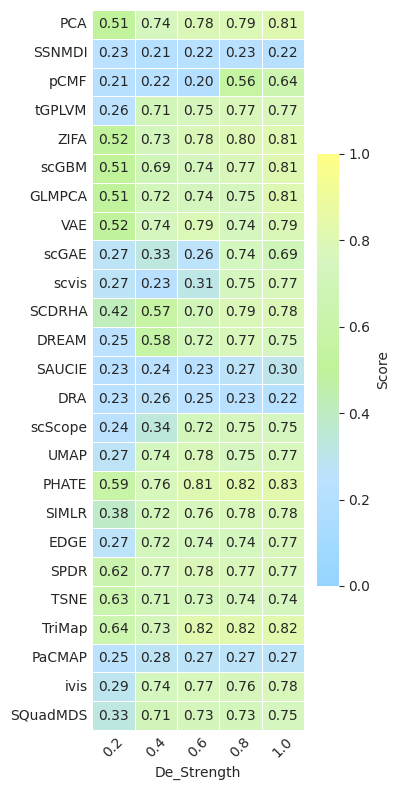

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

datasets = ['de_0.2','de_0.4','de_0.6','de_0.8','de_1.0']

score_dict = {}

for dataset in datasets:
    score_path = f'/home/henu/work/result/score/stability/1/de_strength/{dataset}.csv'
    df = pd.read_csv(score_path)
    s = df.set_index('Method')['Score']
    score_dict[dataset] = s

df_all = pd.concat(score_dict, axis=1)
df_all.columns = datasets

# 去掉不用的方法，并改名
excluded_methods = ['SQuaD_MDS', 'ParametricUMAP200', 'ParametricUMAP50']
df_all = df_all[~df_all.index.isin(excluded_methods)]
df_all.rename(index={'SQuaD_MDS_hybrid': 'SQuadMDS'}, inplace=True)

# ------------ 1. 按类别给方法排序 ------------
categories = {
    "Linear and Probabilistic Factor Models": [
        "PCA", "SSNMDI", "pCMF", "tGPLVM", "ZIFA", "scGBM", "GLMPCA"
    ],
    "Deep Autoencoders and Generative Models": [
        "VAE", "scGAE", "scvis", "SCDRHA", "DREAM","SAUCIE", "DRA", "scScope"
    ],
    "Graph-Based and Diffusion Geometry Models": [
        "UMAP", "PHATE", "SIMLR", "EDGE", "SPDR"
    ],
    "Metric Learning and Structure-Aware Embedding": [
        "TSNE", "TriMap", "PaCMAP", "ivis", "SQuadMDS"
    ]
}

# 按类别直接拼接顺序（严格使用你写的顺序）
method_order = (
    categories["Linear and Probabilistic Factor Models"] +
    categories["Deep Autoencoders and Generative Models"] +
    categories["Graph-Based and Diffusion Geometry Models"] +
    categories["Metric Learning and Structure-Aware Embedding"]
)

df_all = df_all.loc[method_order]
print(df_all.index)

# ------------ 2. 画热图（按你原来的格式） ------------
heatmap_data = df_all.copy()
heatmap_data.columns = ['0.2','0.4','0.6','0.8','1.0']

plt.figure(figsize=(4, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap=cmap,     # 你前面定义好的配色
    linewidths=0.5,
    cbar_kws={'label': 'Score', 'shrink': 0.6, 'extend': 'neither'},
    vmin=0.0,
    vmax=1.0
)

# 坐标轴装饰（照你给的模板）
ax.set_xlabel('De_Strength')
ax.set_ylabel('')
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='both', length=0)
# ax.xaxis.tick_bottom()
plt.xticks(rotation=45)

plt.tight_layout()

save_dir = '/home/henu/work/result/score/stability/1/figures/'
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'de_strength.svg'))
plt.show()

Index(['PCA', 'SSNMDI', 'pCMF', 'tGPLVM', 'ZIFA', 'scGBM', 'GLMPCA', 'VAE',
       'scGAE', 'scvis', 'SCDRHA', 'DREAM', 'SAUCIE', 'DRA', 'scScope', 'UMAP',
       'PHATE', 'SIMLR', 'EDGE', 'SPDR', 'TSNE', 'TriMap', 'PaCMAP', 'ivis',
       'SQuadMDS'],
      dtype='object', name='Method')


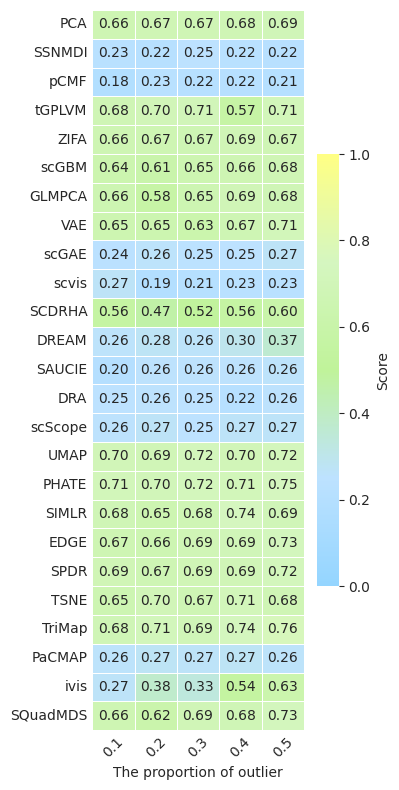

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

datasets = ['out_0.1','out_0.2','out_0.3','out_0.4','out_0.5']

score_dict = {}

for dataset in datasets:
    score_path = f'/home/henu/work/result/score/stability/1/out/{dataset}.csv'
    df = pd.read_csv(score_path)
    s = df.set_index('Method')['Score']
    score_dict[dataset] = s

df_all = pd.concat(score_dict, axis=1)
df_all.columns = datasets

# 去掉不用的方法，并改名
excluded_methods = ['SQuaD_MDS', 'ParametricUMAP200', 'ParametricUMAP50']
df_all = df_all[~df_all.index.isin(excluded_methods)]
df_all.rename(index={'SQuaD_MDS_hybrid': 'SQuadMDS'}, inplace=True)

# ------------ 1. 按类别给方法排序 ------------
categories = {
    "Linear and Probabilistic Factor Models": [
        "PCA", "SSNMDI", "pCMF", "tGPLVM", "ZIFA", "scGBM", "GLMPCA"
    ],
    "Deep Autoencoders and Generative Models": [
        "VAE", "scGAE", "scvis", "SCDRHA", "DREAM","SAUCIE", "DRA", "scScope"
    ],
    "Graph-Based and Diffusion Geometry Models": [
        "UMAP", "PHATE", "SIMLR", "EDGE", "SPDR"
    ],
    "Metric Learning and Structure-Aware Embedding": [
        "TSNE", "TriMap", "PaCMAP", "ivis", "SQuadMDS"
    ]
}

# 按类别直接拼接顺序（严格使用你写的顺序）
method_order = (
    categories["Linear and Probabilistic Factor Models"] +
    categories["Deep Autoencoders and Generative Models"] +
    categories["Graph-Based and Diffusion Geometry Models"] +
    categories["Metric Learning and Structure-Aware Embedding"]
)

df_all = df_all.loc[method_order]
print(df_all.index)

# ------------ 2. 画热图（按你原来的格式） ------------
heatmap_data = df_all.copy()
heatmap_data.columns = ['0.1','0.2','0.3','0.4','0.5']

plt.figure(figsize=(4, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap=cmap,     # 你前面定义好的配色
    linewidths=0.5,
    cbar_kws={'label': 'Score', 'shrink': 0.6, 'extend': 'neither'},
    vmin=0.0,
    vmax=1.0
)

# 坐标轴装饰（照你给的模板）
ax.set_xlabel('The proportion of outlier')
ax.set_ylabel('')
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='both', length=0)
# ax.xaxis.tick_bottom()
plt.xticks(rotation=45)

plt.tight_layout()

save_dir = '/home/henu/work/result/score/stability/1/figures/'
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'out.svg'))
plt.show()

Index(['PCA', 'SSNMDI', 'pCMF', 'tGPLVM', 'ZIFA', 'scGBM', 'GLMPCA', 'VAE',
       'scGAE', 'scvis', 'SCDRHA', 'DREAM', 'SAUCIE', 'DRA', 'scScope', 'UMAP',
       'PHATE', 'SIMLR', 'EDGE', 'SPDR', 'TSNE', 'TriMap', 'PaCMAP', 'ivis',
       'SQuadMDS'],
      dtype='object', name='Method')


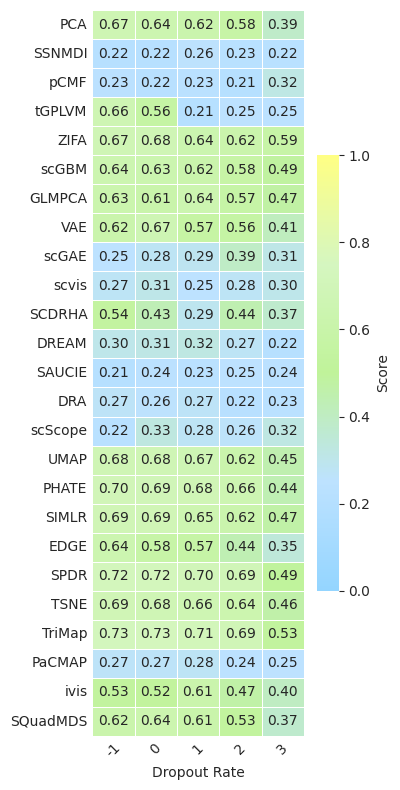

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

datasets = ['dropout_-1','dropout_0', 'dropout_1', 'dropout_2', 'dropout_3']

score_dict = {}

for dataset in datasets:
    score_path = f'/home/henu/work/result/score/stability/1/dropout/{dataset}.csv'
    df = pd.read_csv(score_path)
    s = df.set_index('Method')['Score']
    score_dict[dataset] = s

df_all = pd.concat(score_dict, axis=1)
df_all.columns = datasets

# 去掉不用的方法，并改名
excluded_methods = ['SQuaD_MDS', 'ParametricUMAP200', 'ParametricUMAP50']
df_all = df_all[~df_all.index.isin(excluded_methods)]
df_all.rename(index={'SQuaD_MDS_hybrid': 'SQuadMDS'}, inplace=True)

# ------------ 1. 按类别给方法排序 ------------
categories = {
    "Linear and Probabilistic Factor Models": [
        "PCA", "SSNMDI", "pCMF", "tGPLVM", "ZIFA", "scGBM", "GLMPCA"
    ],
    "Deep Autoencoders and Generative Models": [
        "VAE", "scGAE", "scvis", "SCDRHA", "DREAM","SAUCIE", "DRA", "scScope"
    ],
    "Graph-Based and Diffusion Geometry Models": [
        "UMAP", "PHATE", "SIMLR", "EDGE", "SPDR"
    ],
    "Metric Learning and Structure-Aware Embedding": [
        "TSNE", "TriMap", "PaCMAP", "ivis", "SQuadMDS"
    ]
}

# 按类别直接拼接顺序（严格使用你写的顺序）
method_order = (
    categories["Linear and Probabilistic Factor Models"] +
    categories["Deep Autoencoders and Generative Models"] +
    categories["Graph-Based and Diffusion Geometry Models"] +
    categories["Metric Learning and Structure-Aware Embedding"]
)

df_all = df_all.loc[method_order]
print(df_all.index)

# ------------ 2. 画热图（按你原来的格式） ------------
heatmap_data = df_all.copy()
heatmap_data.columns = ['-1','0','1','2','3']

plt.figure(figsize=(4, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap=cmap,     # 你前面定义好的配色
    linewidths=0.5,
    cbar_kws={'label': 'Score', 'shrink': 0.6, 'extend': 'neither'},
    vmin=0.0,
    vmax=1.0
)

# 坐标轴装饰（照你给的模板）
ax.set_xlabel('Dropout Rate')
ax.set_ylabel('')
# ax.xaxis.set_ticks_position('top')
# ax.xaxis.set_label_position('top')
ax.tick_params(axis='both', which='both', length=0)
# ax.xaxis.tick_bottom()
plt.xticks(rotation=45)

plt.tight_layout()

save_dir = '/home/henu/work/result/score/stability/1/figures/'
os.makedirs(save_dir, exist_ok=True)
plt.savefig(os.path.join(save_dir, 'dropout.svg'))
plt.show()